In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import default_rng
from scipy.stats import ttest_ind
rng = default_rng()


In [243]:
# benchmarkName = "ab-main-main-2022-11-04T12:30:42+01:00"
benchmarkName = "ab-main-main-2022-11-10T17:34:23+01:00"
# benchmarkName = "ab-main-perf-issue-clean-path-2022-11-05T20:39:50+01:00"
# benchmarkName = "ab-main-perf-issue-request-id-2022-11-04T14:18:47+01:00"
# benchmarkName = "ab-main-perf-issue-basic-auth-2022-11-06T13:36:52+01:00"
maxCutoffDuration = 120
# maxCutoffDuration = 600

df1 = pd.read_csv(f"../results/fbs/{benchmarkName}/v1.csv.gz")
df2 = pd.read_csv(f"../results/fbs/{benchmarkName}/v2.csv.gz")
df = pd.concat([df1, df2])
df.head(n=50)

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,iter,method,name,scenario,status,url,extra_tags
0,http_reqs,1668098141,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
1,http_req_duration,1668098141,12.706328,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
2,http_req_blocked,1668098141,0.192033,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
3,http_req_connecting,1668098141,0.133145,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
4,http_req_tls_handshaking,1668098141,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
5,http_req_sending,1668098141,0.064693,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
6,http_req_waiting,1668098141,12.523810,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
7,http_req_receiving,1668098141,0.117825,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
8,http_req_failed,1668098141,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1
9,http_reqs,1668098141,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,version=v1


In [244]:
df_req_durations = df[df['metric_name'] == 'http_req_duration'].copy()

df_req_durations.rename(columns={'extra_tags': 'version', 'name': 'path'}, inplace=True)
df_req_durations['version'] = df_req_durations['version'].str.replace('version=', '')
df_req_durations['endpoint'] = df_req_durations['method'] + " " + df_req_durations['path'].str[3:]

# add 60 seconds to the first timestamp
minCutoffTs = df_req_durations['timestamp'].min() + 60
# use relative timestamps
df_req_durations['timestamp'] = df_req_durations['timestamp'] - minCutoffTs
maxCutoffTs = df_req_durations['timestamp'].max() - maxCutoffDuration
df_req_durations

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,iter,method,path,scenario,status,url,version,endpoint
1,http_req_duration,-60,12.706328,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,v1,GET /destinations
10,http_req_duration,-60,49.712360,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,v1,GET /destinations
19,http_req_duration,-60,50.806859,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.15.204:3000/destinations,v1,GET /destinations
28,http_req_duration,-60,60.390574,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,v1,GET /destinations
37,http_req_duration,-60,72.901209,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.15.204:3000/destinations,v1,GET /destinations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358083,http_req_duration,1112,0.538827,NaN,NaN,NaN,True,379.0,POST,${}/bookings,searchAndBookFlight,200.0,http://10.132.15.204:3001/bookings,v2,POST /bookings
2358099,http_req_duration,1112,1.426213,NaN,NaN,NaN,True,379.0,GET,${}/flights/${}/seats,searchAndBookFlight,200.0,http://10.132.15.204:3001/flights/76fdc931-e27...,v2,GET /flights/${}/seats
2358108,http_req_duration,1112,1.526895,NaN,NaN,NaN,True,379.0,GET,${}/flights/${}/seats,searchAndBookFlight,200.0,http://10.132.15.204:3001/flights/eae276de-38d...,v2,GET /flights/${}/seats
2358117,http_req_duration,1112,0.502099,NaN,NaN,NaN,True,379.0,POST,${}/bookings,searchAndBookFlight,200.0,http://10.132.15.204:3001/bookings,v2,POST /bookings


In [245]:
# enforce cutoff
df_filtered = df_req_durations[(df_req_durations['timestamp'] >= 0) & (df_req_durations['timestamp'] <= maxCutoffTs)]
df_filtered.groupby(['endpoint', 'version']).size()


endpoint                version
GET /destinations       v1         95853
                        v2         96037
GET /flights/${}/seats  v1          3296
                        v2          3291
GET /flights?from=${}   v1         95858
                        v2         96036
POST /bookings          v1          3293
                        v2          3292
dtype: int64

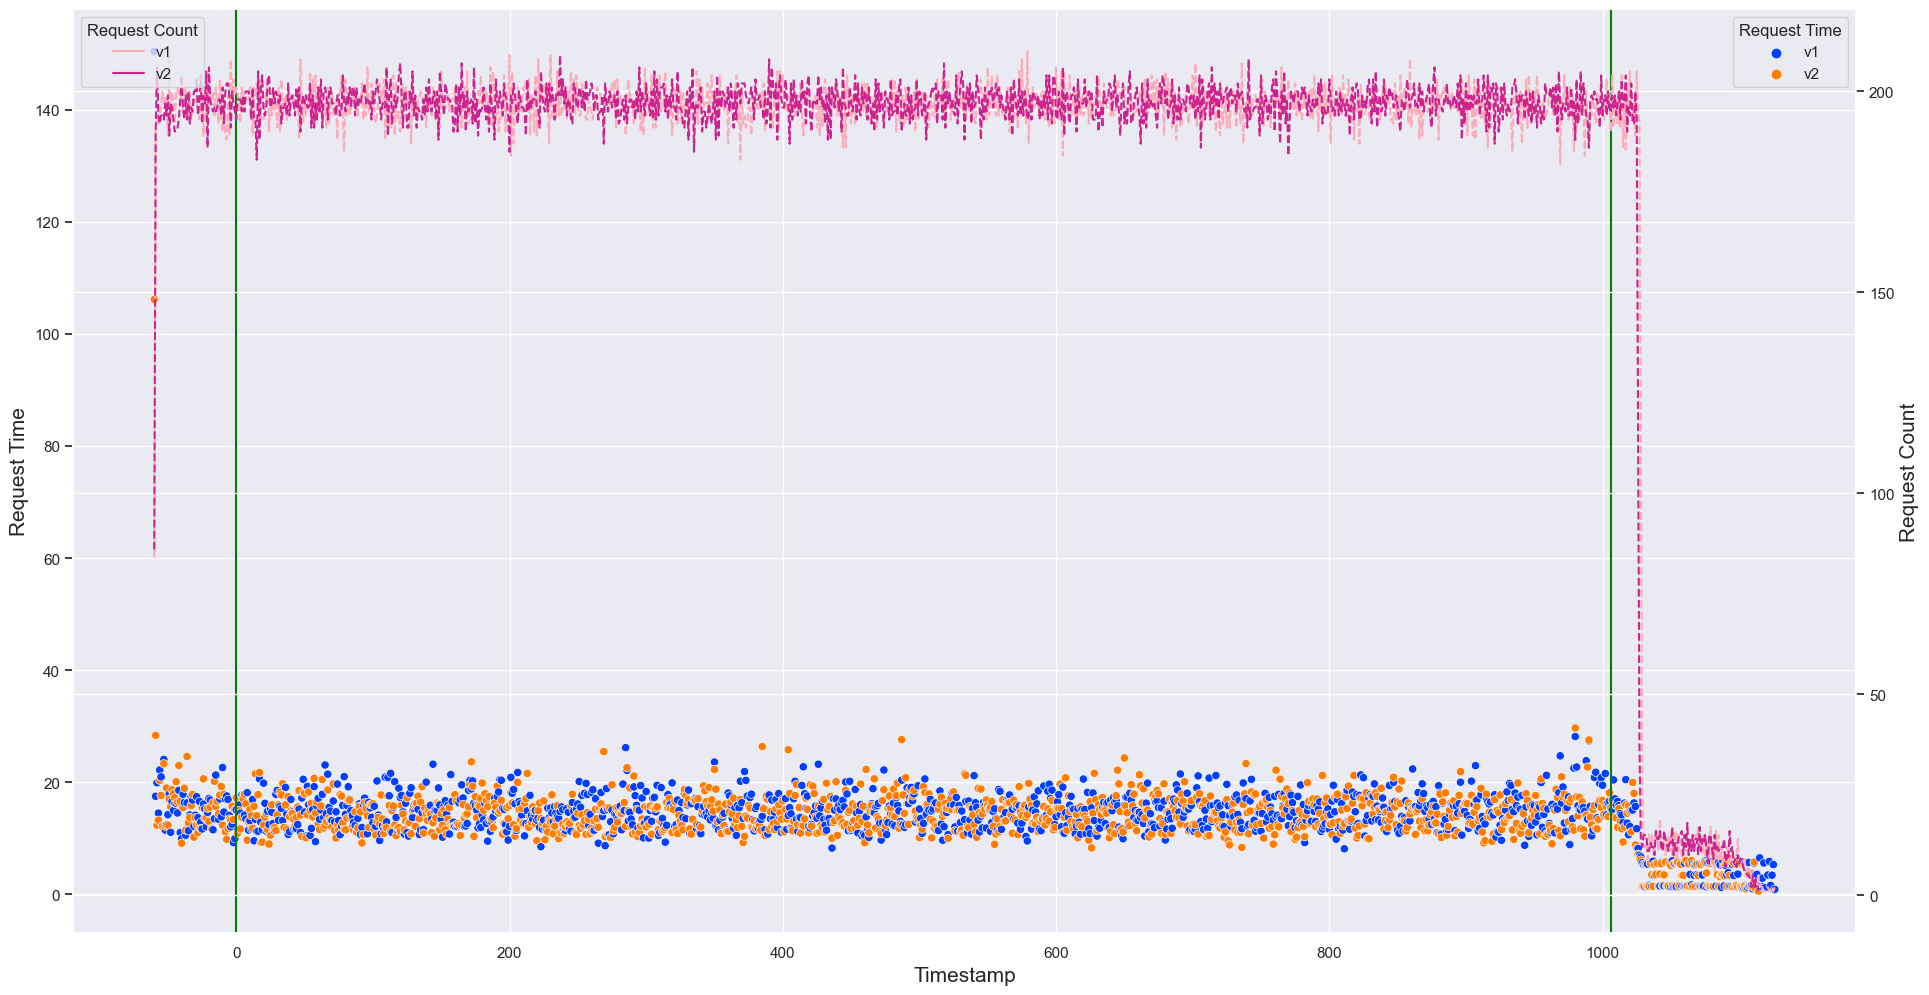

In [246]:
plot_df = df_req_durations.groupby(['timestamp', 'version'])\
  .agg(
    count=('status', 'count'),
    request_duration_median=('metric_value', 'median')
  ).reset_index()

# plot
paletteTime = sns.color_palette("bright", 2)
paletteCount = sns.color_palette("RdPu", 2)

sns.set(rc={'figure.figsize':(23,12)})
g = sns.scatterplot(data = plot_df, x='timestamp', y='request_duration_median', hue='version', palette=paletteTime)
g.axvline(maxCutoffTs, color = "green")
g.axvline(0, color = "green")
g.set_xlabel("Timestamp", fontsize = 15)
g.set_ylabel("Request Time", fontsize = 15)
# g.set_ylim([0, 8500])
g.legend(title="Request Time")
ax2 = g.twinx()
ax2.set_ylabel("Request Count", fontsize = 15)
#ax2.set_ylim([0, 2000])
g2 = sns.lineplot(data = plot_df, x='timestamp', y='count', hue='version', ax=ax2, palette=paletteCount, linestyle="--")
g2.legend(title="Request Count", loc = 'upper left')
g.figure.savefig(f"{benchmarkName}-all-requests.pdf")

/Users/christophwitzko/Dropbox/Cloud/Studium/TUB/master-thesis/master-thesis/analysis/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/christophwitzko/Dropbox/Cloud/Studium/TUB/master-thesis/master-thesis/analysis/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/christophwitzko/Dropbox/Cloud/Studium/TUB/master-thesis/master-thesis/analysis/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/christophwitzko/Dropbox/Cloud/Studium/TUB/master-thesis/master-thesis/analysis/venv/lib/python3.10/sit

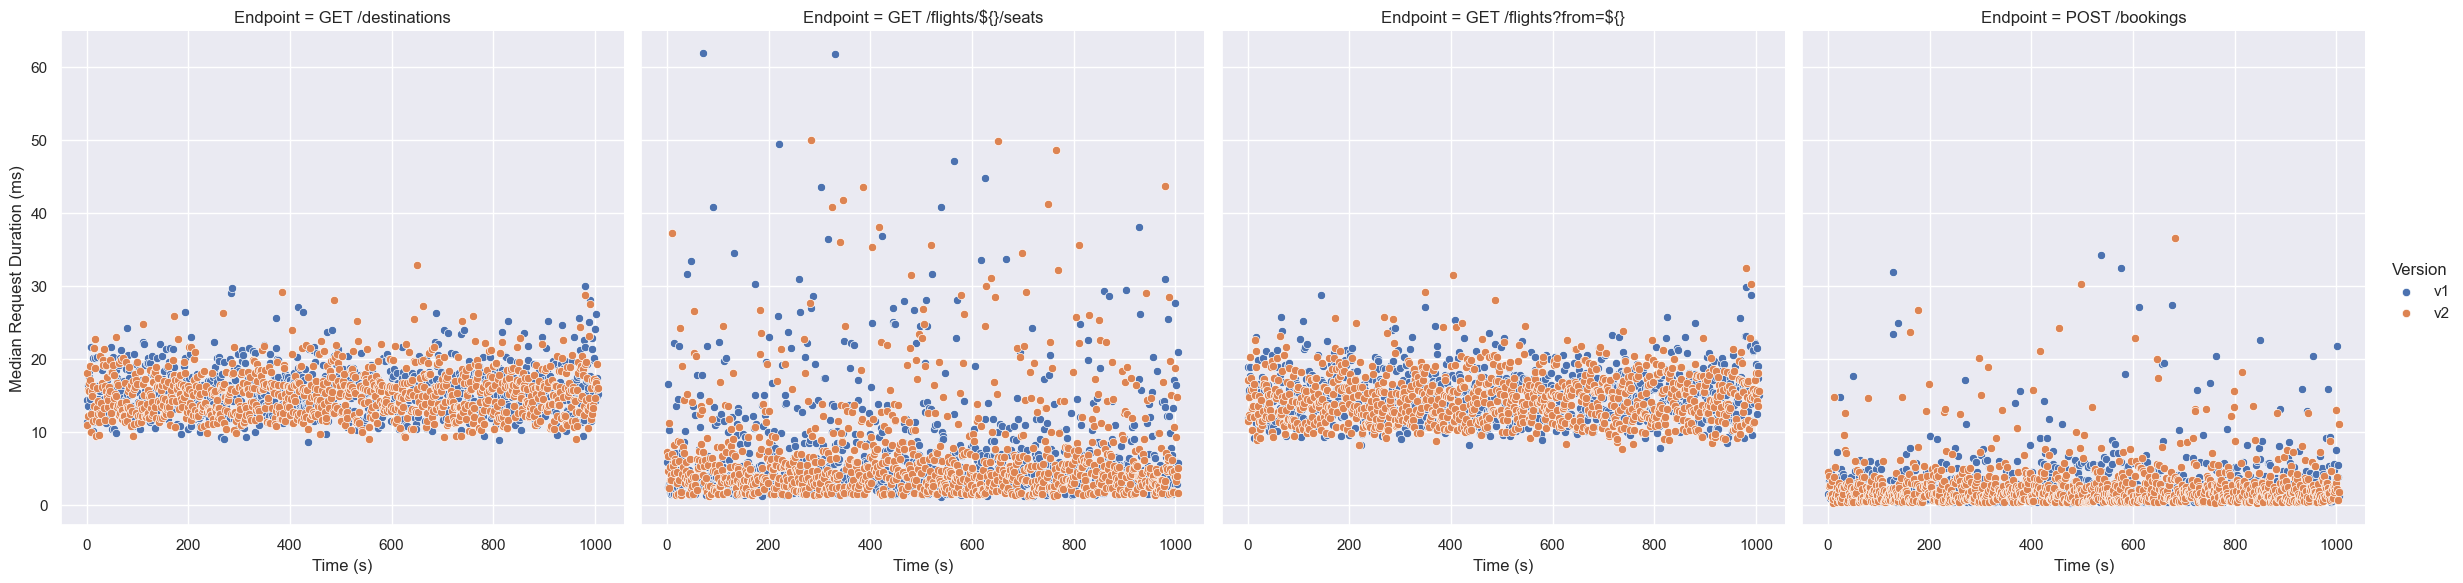

In [247]:
# Requests per Endpoint
plot_df2 = df_filtered\
  .groupby(['timestamp', 'endpoint', 'version']) .agg(
    count=('status', 'count'),
    request_duration_median=('metric_value', 'median'),
  ).reset_index()
plot_df2['Endpoint'] = plot_df2['endpoint']

g = sns.FacetGrid(plot_df2, col="Endpoint", height=6, hue='version')
g.map(sns.scatterplot,  'timestamp', 'request_duration_median')
g.add_legend(title="Version")
g.set_axis_labels("Time (s)", "Median Request Duration (ms)")
g.savefig(f"{benchmarkName}-requests-by-endpoint.pdf")
g

In [248]:
def bootstrap(perfRuntimes1: pd.DataFrame, perfRuntimes2: pd.DataFrame):
  allRuntimes1 = perfRuntimes1['metric_value'].to_numpy()
  allRuntimes2 = perfRuntimes2['metric_value'].to_numpy()
  numberOfSamples = 10000
  # if both list differ in size, we use the smaller one as our draw-size
  # this way we draw less values than the larger list includes
  measurementsCount = min(allRuntimes1.shape[0], allRuntimes2.shape[0])
  currentMeasurementIndexes1 = rng.choice(allRuntimes1.shape[0], size=(measurementsCount, numberOfSamples))
  currentMeasurementIndexes2 = rng.choice(allRuntimes2.shape[0], size=(measurementsCount, numberOfSamples))

  # Bulk selection
  tmp1 = allRuntimes1[currentMeasurementIndexes1]
  tmp1 = np.stack(tmp1, axis=1)
  tmp2 = allRuntimes2[currentMeasurementIndexes2]
  tmp2 = np.stack(tmp2, axis=1)

  # Get median for both lists
  med1 = np.median(tmp1, axis=1)
  med2 = np.median(tmp2, axis=1)
  R = med2/med1
  R.sort()

  CIsmall = 1 # 99% confidence interval
  small = int((numberOfSamples * CIsmall) / 100 / 2)
  if small == 0: small = 1
  minSmall = R[small-1]
  minSmall = (minSmall - 1) * 100
  maxSmall = R[numberOfSamples-small-1]
  maxSmall = (maxSmall - 1) * 100
  instability = maxSmall - minSmall
  refData = (R-1) * 100
  return refData, minSmall, maxSmall, instability

In [249]:
def compareVersionsForEndpoint(epName: str):
  runtimes1 = df_filtered[(df_filtered['version'] == 'v1') & (df_filtered['endpoint'] == epName)]
  runtimes2 = df_filtered[(df_filtered['version'] == 'v2') & (df_filtered['endpoint'] == epName)]
  # print(f"v1={runtimes1.shape[0]} and v2={runtimes2.shape[0]} values are bootstrapped...")
  median1 = runtimes1['metric_value'].median()
  median2 = runtimes2['metric_value'].median()
  change = ((median2/median1) - 1) * 100
  pvalue = ttest_ind(runtimes1['metric_value'], runtimes2['metric_value'], equal_var=False).pvalue
  refData, minci, maxci, instability = bootstrap(runtimes1, runtimes2)
  assert maxci >= change
  assert change >= minci
  print(f"[{epName}] performance change: {change:.2f}% [{minci:.2f} - {maxci:.2f}] ({instability:.2f}%) (p={pvalue:.6f})")
  return {
    'endpoint': epName,
    'change': change,
    'minci': minci,
    'maxci': maxci,
    'refData': refData
  }


bootstrapResults = []
endpointNames = df_filtered['endpoint'].unique()
endpointNames.sort()
for epName in endpointNames:
  bootstrapResults.append(compareVersionsForEndpoint(epName))

bootstrapResults_df = pd.DataFrame(bootstrapResults)
bootstrapResults_df

[GET /destinations] performance change: -3.01% [-4.26 - -1.73] (2.53%) (p=0.000000)
[GET /flights/${}/seats] performance change: -5.18% [-12.50 - 3.16] (15.66%) (p=0.108733)
[GET /flights?from=${}] performance change: -3.53% [-5.01 - -2.02] (2.99%) (p=0.000000)
[POST /bookings] performance change: -8.75% [-17.88 - 1.50] (19.38%) (p=0.751501)


,endpoint,change,minci,maxci,refData
0,GET /destinations,-3.007459,-4.261479,-1.729745,"[-4.867314965658021, -4.600947252727472, -4.56..."
1,GET /flights/${}/seats,-5.182429,-12.503714,3.158212,"[-16.609601477469617, -15.561725066020527, -15..."
2,GET /flights?from=${},-3.533369,-5.010067,-2.024921,"[-5.659898261420615, -5.4887417318737475, -5.4..."
3,POST /bookings,-8.752231,-17.875543,1.501113,"[-23.077434796331865, -22.05128533716073, -21...."


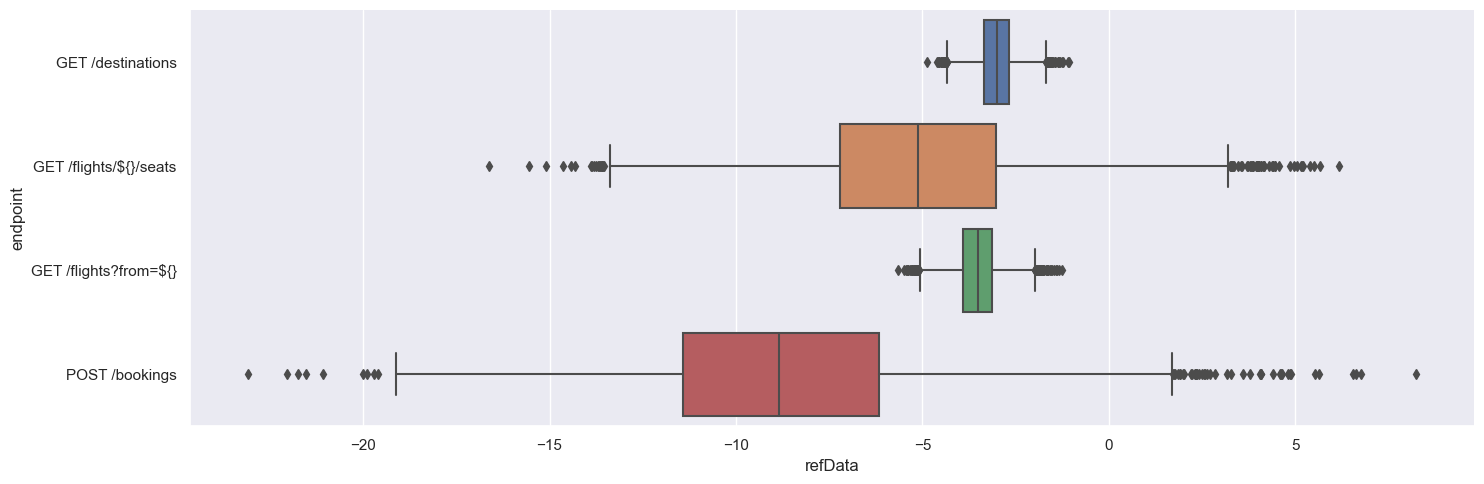

In [250]:
boxPlotDf = bootstrapResults_df.explode('refData')
g = sns.catplot(data=boxPlotDf, x="refData", y="endpoint", kind="box", aspect=3)
g.savefig(f"{benchmarkName}-perf-change.pdf")